In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from matplotlib.backends.backend_pdf import PdfPages
from PIL import Image
import os
import pandas as pd
import numpy as np
import pylab as py
import warnings
import matplotlib.pyplot as plt
from  matplotlib import rc
from matplotlib.colors import LogNorm
from matplotlib import font_manager
import matplotlib
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline as spline
matplotlib.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"
from matplotlib.ticker import ScalarFormatter,MaxNLocator,LogLocator,NullFormatter,FuncFormatter
warnings.filterwarnings('ignore')
import matplotlib.font_manager
from matplotlib.ticker import MultipleLocator, FormatStrFormatter,AutoMinorLocator
from matplotlib.pyplot import gca

In [58]:
df_newFF_Q1 = pd.read_csv("newFF_1.csv",delim_whitespace=True)
df_LIKEn_Q1 = pd.read_csv("LIKEn_1.csv",delim_whitespace=True)
df_newFF_Qmc = pd.read_csv("newFF_mc.csv",delim_whitespace=True)
df_LIKEn_Qmc = pd.read_csv("LIKEn_mc.csv",delim_whitespace=True)

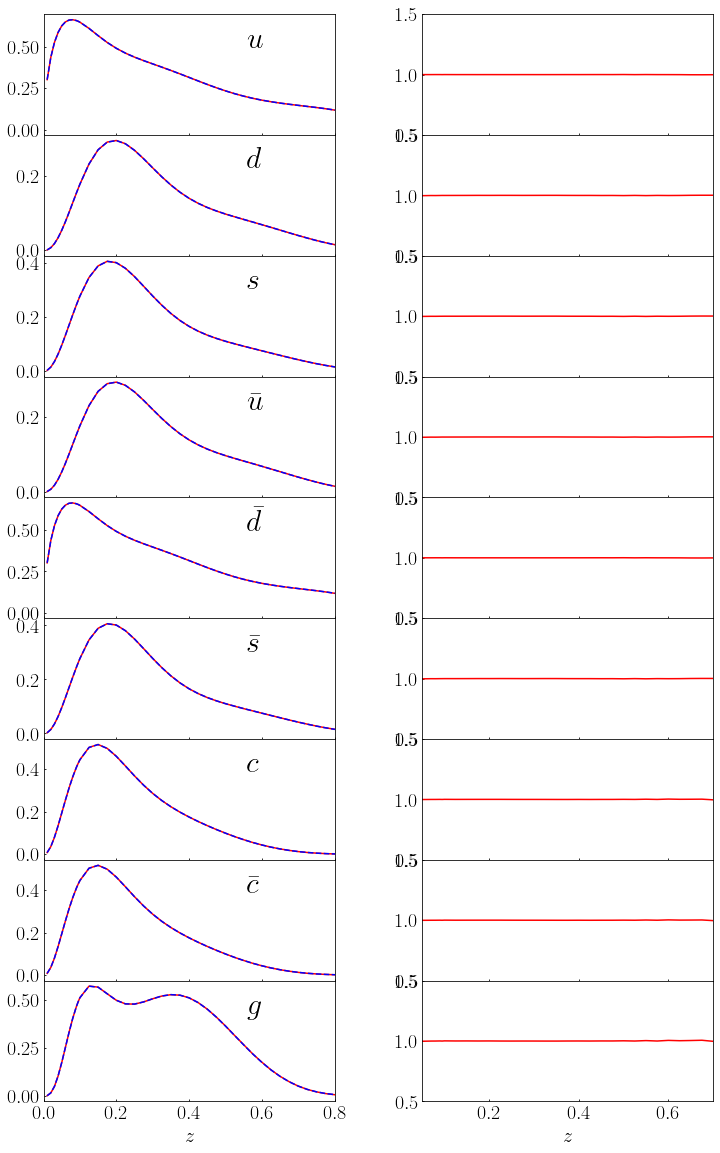

In [67]:
fig, axs = plt.subplots(9, 2,  sharex='col', gridspec_kw={'hspace': 0, 'wspace': 0.3})

sizeOfFont = 20
LIKEn_color = "blue"
newFF_color = "red"

axs[0,0].plot( df_newFF_Q1['Z'], df_newFF_Q1['Z']*df_newFF_Q1['U'], color = newFF_color )
#axs[0,0].plot( df_LIKEn_Q1['Z'], df_newFF_Q1['Z']*(df_LIKEn_Q1['U']+ df_LIKEn_Q1['UB']) , color = LIKEn_color, linestyle = 'dashed' )
axs[0,0].plot( df_LIKEn_Q1['Z'], df_newFF_Q1['Z']*(df_LIKEn_Q1['U']) , color = LIKEn_color, linestyle = 'dashed' )


axs[1,0].plot( df_newFF_Q1['Z'], df_newFF_Q1['Z']*df_newFF_Q1['D'], color = newFF_color )
#axs[1,0].plot( df_LIKEn_Q1['Z'], df_newFF_Q1['Z']*(df_LIKEn_Q1['D'] +  df_LIKEn_Q1['DB']), color = LIKEn_color, linestyle = 'dashed' )
axs[1,0].plot( df_LIKEn_Q1['Z'], df_newFF_Q1['Z']*(df_LIKEn_Q1['D']), color = LIKEn_color, linestyle = 'dashed' )


axs[2,0].plot( df_newFF_Q1['Z'], df_newFF_Q1['Z']*df_newFF_Q1['S'], color = newFF_color )
axs[2,0].plot( df_LIKEn_Q1['Z'], df_newFF_Q1['Z']*df_LIKEn_Q1['S'], color = LIKEn_color, linestyle = 'dashed' )


axs[3,0].plot( df_newFF_Q1['Z'], df_newFF_Q1['Z']*df_newFF_Q1['UB'], color = newFF_color )
axs[3,0].plot( df_LIKEn_Q1['Z'], df_newFF_Q1['Z']*df_LIKEn_Q1['UB'], color = LIKEn_color, linestyle = 'dashed' )


axs[4,0].plot( df_newFF_Q1['Z'], df_newFF_Q1['Z']*df_newFF_Q1['DB'], color = newFF_color )
axs[4,0].plot( df_LIKEn_Q1['Z'], df_newFF_Q1['Z']*df_LIKEn_Q1['DB'], color = LIKEn_color, linestyle = 'dashed' )


axs[5,0].plot( df_newFF_Q1['Z'], df_newFF_Q1['Z']*df_newFF_Q1['SB'], color = newFF_color )
axs[5,0].plot( df_LIKEn_Q1['Z'], df_newFF_Q1['Z']*df_LIKEn_Q1['SB'], color = LIKEn_color, linestyle = 'dashed' )


axs[6,0].plot( df_newFF_Q1['Z'], df_newFF_Q1['Z']*df_newFF_Q1['C'], color = newFF_color )
axs[6,0].plot( df_LIKEn_Q1['Z'], df_newFF_Q1['Z']*df_LIKEn_Q1['C'], color = LIKEn_color, linestyle = 'dashed' )



axs[7,0].plot( df_newFF_Q1['Z'], df_newFF_Q1['Z']*df_newFF_Q1['CB'], color = newFF_color )
axs[7,0].plot( df_LIKEn_Q1['Z'], df_newFF_Q1['Z']*df_LIKEn_Q1['CB'], color = LIKEn_color, linestyle = 'dashed' )


axs[8,0].plot( df_newFF_Q1['Z'], df_newFF_Q1['Z']*df_newFF_Q1['GL'], color = newFF_color )
axs[8,0].plot( df_LIKEn_Q1['Z'], df_newFF_Q1['Z']*df_LIKEn_Q1['GL'], color = LIKEn_color, linestyle = 'dashed' )




#axs[0,1].plot( df_newFF_Q1['Z'], df_newFF_Q1['U']/(df_LIKEn_Q1['U']+ df_LIKEn_Q1['UB']), color = newFF_color )
#axs[1,1].plot( df_newFF_Q1['Z'], df_newFF_Q1['D']/(df_LIKEn_Q1['D']+ df_LIKEn_Q1['DB']), color = newFF_color )

axs[0,1].plot( df_newFF_Q1['Z'], df_newFF_Q1['U']/(df_LIKEn_Q1['U']), color = newFF_color )
axs[1,1].plot( df_newFF_Q1['Z'], df_newFF_Q1['D']/(df_LIKEn_Q1['D']), color = newFF_color )

axs[2,1].plot( df_newFF_Q1['Z'], df_newFF_Q1['S']/df_LIKEn_Q1['S'], color = newFF_color )
axs[3,1].plot( df_newFF_Q1['Z'], df_newFF_Q1['UB']/df_LIKEn_Q1['UB'], color = newFF_color )
axs[4,1].plot( df_newFF_Q1['Z'], df_newFF_Q1['DB']/df_LIKEn_Q1['DB'], color = newFF_color )
axs[5,1].plot( df_newFF_Q1['Z'], df_newFF_Q1['SB']/df_LIKEn_Q1['SB'], color = newFF_color )
axs[6,1].plot( df_newFF_Q1['Z'], df_newFF_Q1['C']/df_LIKEn_Q1['C'], color = newFF_color )
axs[7,1].plot( df_newFF_Q1['Z'], df_newFF_Q1['CB']/df_LIKEn_Q1['CB'], color = newFF_color )
axs[8,1].plot( df_newFF_Q1['Z'], df_newFF_Q1['GL']/df_LIKEn_Q1['GL'], color = newFF_color )




for i in range(9):
    for j in range(2):
        axs[i,j].tick_params(axis = 'both', direction ='in', length = 2, labelsize = sizeOfFont)


axs[0,1].set_ylim(0.5,1.5)
axs[1,1].set_ylim(0.5,1.5)
axs[2,1].set_ylim(0.5,1.5)
axs[3,1].set_ylim(0.5,1.5)
axs[4,1].set_ylim(0.5,1.5)
axs[5,1].set_ylim(0.5,1.5)
axs[6,1].set_ylim(0.5,1.5)
axs[7,1].set_ylim(0.5,1.5)
axs[8,1].set_ylim(0.5,1.5)

axs[8,1].set_xlim(0.05,0.7)
axs[8,0].set_xlim(0.,0.8)



axs[8,0].set_xlabel(r"\rm $z$" , fontsize = sizeOfFont)
axs[8,1].set_xlabel(r"\rm $z$" , fontsize = sizeOfFont)



# Text Boxes ##
props = dict(boxstyle='round', facecolor='white', alpha=0)

axs[0,0].text(0.7, 0.9,  r"\rm $u$", transform=axs[0,0].transAxes, fontsize=30,
    verticalalignment='top', bbox=props)

axs[1,0].text(0.7, 0.9,  r"\rm $d$", transform=axs[1,0].transAxes, fontsize=30,
    verticalalignment='top', bbox=props)

axs[2,0].text(0.7, 0.9,  r"\rm $s$", transform=axs[2,0].transAxes, fontsize=30,
    verticalalignment='top', bbox=props)

axs[3,0].text(0.7, 0.9,  r"\rm $\bar{u}$", transform=axs[3,0].transAxes, fontsize=30,
    verticalalignment='top', bbox=props)

axs[4,0].text(0.7, 0.9,  r"\rm $\bar{d}$", transform=axs[4,0].transAxes, fontsize=30,
    verticalalignment='top', bbox=props)

axs[5,0].text(0.7, 0.9,  r"\rm $\bar{s}$", transform=axs[5,0].transAxes, fontsize=30,
    verticalalignment='top', bbox=props)

axs[6,0].text(0.7, 0.9,  r"\rm $c$", transform=axs[6,0].transAxes, fontsize=30,
    verticalalignment='top', bbox=props)

axs[7,0].text(0.7, 0.9,  r"\rm $\bar{c}$", transform=axs[7,0].transAxes, fontsize=30,
    verticalalignment='top', bbox=props)


axs[8,0].text(0.7, 0.9,  r"\rm $g$", transform=axs[8,0].transAxes, fontsize=30,
    verticalalignment='top', bbox=props)


fig.set_size_inches(12,20)
plt.show()


fig.savefig('Q_1.pdf', bbox_inches = "tight")


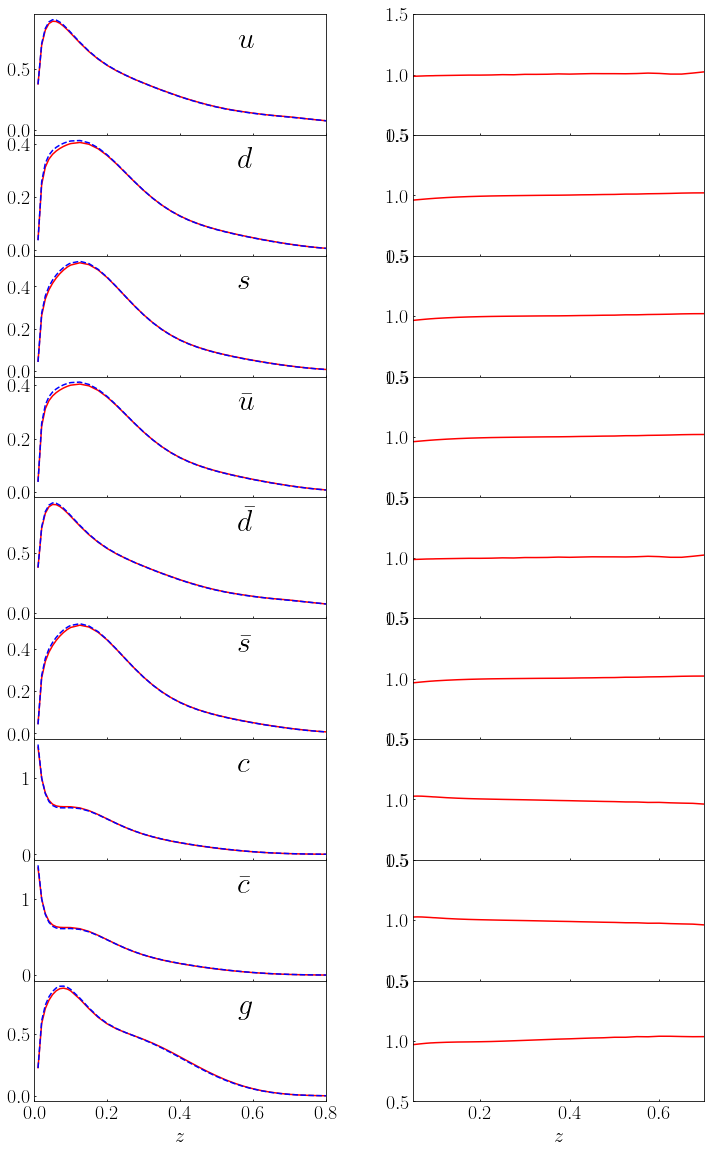

In [66]:
fig, axs = plt.subplots(9, 2,  sharex='col', gridspec_kw={'hspace': 0, 'wspace': 0.3})

sizeOfFont = 20
LIKEn_color = "blue"
newFF_color = "red"

axs[0,0].plot( df_newFF_Qmc['Z'], df_newFF_Qmc['Z']*df_newFF_Qmc['U'], color = newFF_color )
axs[0,0].plot( df_LIKEn_Qmc['Z'], df_LIKEn_Qmc['Z']*(df_LIKEn_Qmc['U'] ) , color = LIKEn_color, linestyle = 'dashed' )

#axs[0,0].plot( df_LIKEn_Qmc['Z'], df_LIKEn_Qmc['Z']*(df_LIKEn_Qmc['U'] + df_LIKEn_Qmc['UB'] ) , color = LIKEn_color, linestyle = 'dashed' )


axs[1,0].plot( df_newFF_Qmc['Z'], df_newFF_Qmc['Z']*df_newFF_Qmc['D'], color = newFF_color )
#axs[1,0].plot( df_LIKEn_Qmc['Z'], df_LIKEn_Qmc['Z']* (df_LIKEn_Qmc['D'] + df_LIKEn_Qmc['DB'] ), color = LIKEn_color, linestyle = 'dashed' )
axs[1,0].plot( df_LIKEn_Qmc['Z'], df_LIKEn_Qmc['Z']* (df_LIKEn_Qmc['D'] ), color = LIKEn_color, linestyle = 'dashed' )


axs[2,0].plot( df_newFF_Qmc['Z'], df_newFF_Qmc['Z']*df_newFF_Qmc['S'], color = newFF_color )
axs[2,0].plot( df_LIKEn_Qmc['Z'], df_newFF_Qmc['Z']*df_LIKEn_Qmc['S'], color = LIKEn_color, linestyle = 'dashed' )


axs[3,0].plot( df_newFF_Qmc['Z'], df_newFF_Qmc['Z']*df_newFF_Qmc['UB'], color = newFF_color )
axs[3,0].plot( df_LIKEn_Qmc['Z'], df_newFF_Qmc['Z']*df_LIKEn_Qmc['UB'], color = LIKEn_color, linestyle = 'dashed' )


axs[4,0].plot( df_newFF_Qmc['Z'], df_newFF_Qmc['Z']*df_newFF_Qmc['DB'], color = newFF_color )
axs[4,0].plot( df_LIKEn_Qmc['Z'], df_newFF_Qmc['Z']*df_LIKEn_Qmc['DB'], color = LIKEn_color, linestyle = 'dashed' )


axs[5,0].plot( df_newFF_Qmc['Z'], df_newFF_Qmc['Z']*df_newFF_Qmc['SB'], color = newFF_color )
axs[5,0].plot( df_LIKEn_Qmc['Z'], df_newFF_Qmc['Z']*df_LIKEn_Qmc['SB'], color = LIKEn_color, linestyle = 'dashed' )


axs[6,0].plot( df_newFF_Qmc['Z'], df_newFF_Qmc['Z']*df_newFF_Qmc['C'], color = newFF_color )
axs[6,0].plot( df_LIKEn_Qmc['Z'], df_newFF_Qmc['Z']*df_LIKEn_Qmc['C'], color = LIKEn_color, linestyle = 'dashed' )



axs[7,0].plot( df_newFF_Qmc['Z'], df_newFF_Qmc['Z']*df_newFF_Qmc['CB'], color = newFF_color )
axs[7,0].plot( df_LIKEn_Qmc['Z'], df_newFF_Qmc['Z']*df_LIKEn_Qmc['CB'], color = LIKEn_color, linestyle = 'dashed' )


axs[8,0].plot( df_newFF_Qmc['Z'], df_newFF_Qmc['Z']*df_newFF_Qmc['GL'], color = newFF_color )
axs[8,0].plot( df_LIKEn_Qmc['Z'], df_newFF_Qmc['Z']*df_LIKEn_Qmc['GL'], color = LIKEn_color, linestyle = 'dashed' )




#axs[0,1].plot( df_newFF_Qmc['Z'], df_newFF_Qmc['U']/(df_LIKEn_Qmc['U']+ df_LIKEn_Qmc['UB']), color = newFF_color )
#axs[1,1].plot( df_newFF_Qmc['Z'], df_newFF_Qmc['D']/(df_LIKEn_Qmc['D']+ df_LIKEn_Qmc['DB']), color = newFF_color )


axs[0,1].plot( df_newFF_Qmc['Z'], df_newFF_Qmc['U']/(df_LIKEn_Qmc['U']), color = newFF_color )
axs[1,1].plot( df_newFF_Qmc['Z'], df_newFF_Qmc['D']/(df_LIKEn_Qmc['D']), color = newFF_color )
axs[2,1].plot( df_newFF_Qmc['Z'], df_newFF_Qmc['S']/df_LIKEn_Qmc['S'], color = newFF_color )
axs[3,1].plot( df_newFF_Qmc['Z'], df_newFF_Qmc['UB']/df_LIKEn_Qmc['UB'], color = newFF_color )
axs[4,1].plot( df_newFF_Qmc['Z'], df_newFF_Qmc['DB']/df_LIKEn_Qmc['DB'], color = newFF_color )
axs[5,1].plot( df_newFF_Qmc['Z'], df_newFF_Qmc['SB']/df_LIKEn_Qmc['SB'], color = newFF_color )
axs[6,1].plot( df_newFF_Qmc['Z'], df_newFF_Qmc['C']/df_LIKEn_Qmc['C'], color = newFF_color )
axs[7,1].plot( df_newFF_Qmc['Z'], df_newFF_Qmc['CB']/df_LIKEn_Qmc['CB'], color = newFF_color )
axs[8,1].plot( df_newFF_Qmc['Z'], df_newFF_Qmc['GL']/df_LIKEn_Qmc['GL'], color = newFF_color )



for i in range(9):
    for j in range(2):
        axs[i,j].tick_params(axis = 'both', direction ='in', length = 2, labelsize = sizeOfFont)


axs[0,1].set_ylim(0.5,1.5)
axs[1,1].set_ylim(0.5,1.5)
axs[2,1].set_ylim(0.5,1.5)
axs[3,1].set_ylim(0.5,1.5)
axs[4,1].set_ylim(0.5,1.5)
axs[5,1].set_ylim(0.5,1.5)
axs[6,1].set_ylim(0.5,1.5)
axs[7,1].set_ylim(0.5,1.5)
axs[8,1].set_ylim(0.5,1.5)

axs[8,1].set_xlim(0.05,0.7)
axs[8,0].set_xlim(0.,0.8)



axs[8,0].set_xlabel(r"\rm $z$" , fontsize = sizeOfFont)
axs[8,1].set_xlabel(r"\rm $z$" , fontsize = sizeOfFont)



# Text Boxes ##
props = dict(boxstyle='round', facecolor='white', alpha=0)

axs[0,0].text(0.7, 0.9,  r"\rm $u$", transform=axs[0,0].transAxes, fontsize=30,
    verticalalignment='top', bbox=props)

axs[1,0].text(0.7, 0.9,  r"\rm $d$", transform=axs[1,0].transAxes, fontsize=30,
    verticalalignment='top', bbox=props)

axs[2,0].text(0.7, 0.9,  r"\rm $s$", transform=axs[2,0].transAxes, fontsize=30,
    verticalalignment='top', bbox=props)

axs[3,0].text(0.7, 0.9,  r"\rm $\bar{u}$", transform=axs[3,0].transAxes, fontsize=30,
    verticalalignment='top', bbox=props)

axs[4,0].text(0.7, 0.9,  r"\rm $\bar{d}$", transform=axs[4,0].transAxes, fontsize=30,
    verticalalignment='top', bbox=props)

axs[5,0].text(0.7, 0.9,  r"\rm $\bar{s}$", transform=axs[5,0].transAxes, fontsize=30,
    verticalalignment='top', bbox=props)

axs[6,0].text(0.7, 0.9,  r"\rm $c$", transform=axs[6,0].transAxes, fontsize=30,
    verticalalignment='top', bbox=props)

axs[7,0].text(0.7, 0.9,  r"\rm $\bar{c}$", transform=axs[7,0].transAxes, fontsize=30,
    verticalalignment='top', bbox=props)


axs[8,0].text(0.7, 0.9,  r"\rm $g$", transform=axs[8,0].transAxes, fontsize=30,
    verticalalignment='top', bbox=props)


fig.set_size_inches(12,20)
plt.show()


fig.savefig('Q_2.pdf', bbox_inches = "tight")
